# Elementary Data Analysis of Meteorite Landings
by John Lubisich

## Introduction


I chose to analyze a dataset I found on NASA's website on Meteorite Landings. This dataset was made by Meteoritical Society and was last updated in January of 2023. This dataset includes rows with the name of the meteorite, id, name type, class, mass, if it was found when it fell or found later, year found, and its latitude and longitude. For this analysis I mainly focused on the mass and class of each meteorite. This analysis' goal is to provide more information on meteorite landing effects on Earth for scientists interested in studying meteors.

## Loading the Data

For this project I used pandas, numpy and matplotlib. Seaborn was also imported for visual asthetics on graphs. Here I imported the libraries and also read in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "darkgrid")

In [2]:
df = pd.read_csv('datasets/Meteorite_Landings.csv')


Above is just reading in the data which is a csv file and below is displaying the first few rows to make sure it loaded in properly.

In [3]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


## Cleaning the Data

In [4]:
df = df.dropna()
df.isnull().values.any()

False

There was some data that had null values in this dataset so I dropped them in order to perform adequate analysis.

In [5]:
df.columns = ['Name','ID','NameType','Class','Mass','Fall','Year','Latitude','Longitude','GeoLocation'] # renaming columns

In [6]:
df.dtypes

Name            object
ID               int64
NameType        object
Class           object
Mass           float64
Fall            object
Year           float64
Latitude       float64
Longitude      float64
GeoLocation     object
dtype: object

In [7]:
df.drop(columns = 'ID', inplace = True)
df.drop(columns = 'NameType', inplace = True)
df.head()

,Name,Class,Mass,Fall,Year,Latitude,Longitude,GeoLocation
0,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


Above was just some basic cleaning. I first renamed all the columns just to make the data a little less confusing and clean. Then I displayed the types of data just to see what I was working with and lastly I removed columns that I thought were unneccessary for my analysis. I then displayed the first few rows of the dataset just to make sure all the transformations had gone smmothly.

## Data Visualization

### Found and Fell

This pie chart represents the ratio of Meteorites observed while falling towards earth and meteorites observed while on the surface. Under the column in the dataset labeled 'Fall', each row had one of two possible values, Found or Fell. Found means that the meteorite was observed and recorded after it had already reached the surface while Fell means that the meteorite was obeserved while falling.



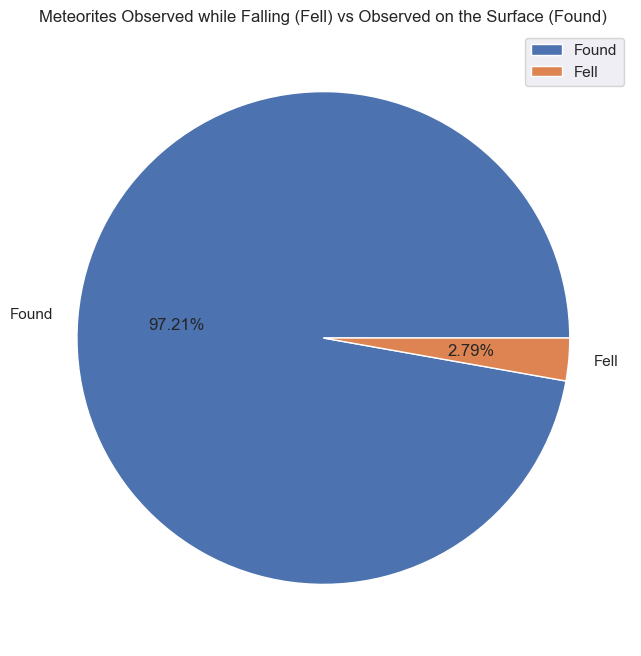

In [8]:
fall_data = df['Fall'].value_counts()
fall_data.plot(kind = "pie", 
           autopct = "%.2f%%",
           title = "Meteorites Observed while Falling (Fell) vs Observed on the Surface (Found)", 
           ylabel = "",
           figsize=(8,8) 
           )
plt.legend()
plt.show()

This pie graph was able to show us that the vast majority of meteorites were observed after they had fallen compared to observed while falling. This makes sense because of how rare it is to spot a meteor while in its fall to earth. There are many reasons that back this claim including how meteors are more visible during the night, being small and not very visible to the human eye while in the sky and also how the distribution of the human population makes it so actually witnessing a meteor in its fall is quite rare. All these factors back the pie graph and its visual showing an overwhelming amount of meteorites found on the ground after they have fallen.


## Meteorite Class

Meteorites are often put into classes based on composition (iron, stone, metallic ect.). These classes can get very specific however, which is why I decided to focus the analysis on the more common classes.

In [9]:
len(df["Class"].unique())

422

I first tried to get a sense of how many different, unique classes of meteorites I was dealing with in this dataset. After performing the function above, I saw that there was a great amount of them.

In [10]:
class_counts = df['Class'].value_counts() #how many of each class
class_counts.head(10)

L6      7519
H5      6243
H6      3898
H4      3880
L5      3264
LL5     2199
LL6     1660
L4       939
H4/5     395
CM2      330
Name: Class, dtype: int64

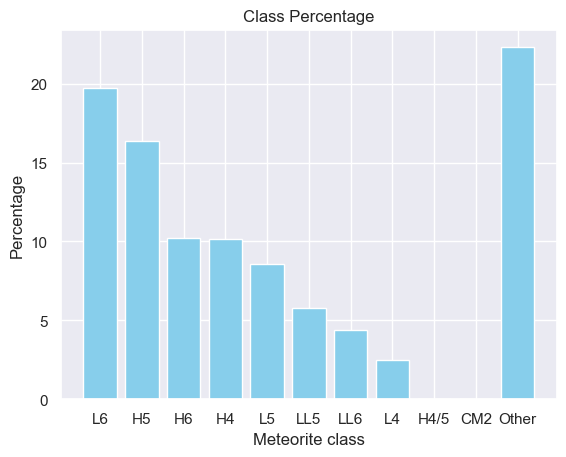

In [11]:
# plotting the percentage of each class

categories = ["L6", "H5", "H6", "H4", "L5", "LL5", "LL6", "L4", "H4/5", "CM2", "Other"]
values = [19.73, 16.38, 10.23, 10.18, 8.56, 5.77, 4.36, 2.46, 0.01, 0.008, 22.312] 

# values taken from class_count in the cell above turned into a percentage

plt.bar(categories, values, color='skyblue')


plt.xlabel('Meteorite class')
plt.ylabel('Percentage')
plt.title('Class Percentage')



plt.show()

This visual shows the distrubtion of classes in the meteorite data. It shows the top 10 most commonly found class of meteorite and the rest put under 'others'. These 10 common classes made up for 77.67% of the data and the rest of the data were found in such small amounts that they had to be assorted together in the 'other' bar. After discovering how all the variety of classes made up for only fractions of a percentage I decided to focus on the top 10 for further analysis since they were the most common by far.

Being able to distinguish the most common types of meteorite classes is important for several reasons and can help researchers gain understanding about the solar system. Finding the most common classes can help researchers discover patterns in composition, dating methods can be used for discovering the age and order of events, impact on human history and more. All of this help researchers paint the picture for the formation of our solar system and understand more about space.

### Meteorite Class Mass

In [12]:
l6_class = df[df["Class"] == "L6"]
h5_class = df[df["Class"] == "H5"]
h6_class = df[df["Class"] == "H6"]
h4_class = df[df["Class"] == "H4"]
l5_class = df[df["Class"] == "L5"]
ll5_class = df[df["Class"] == "LL5"]
ll6_class = df[df["Class"] == "LL6"]
l4_class = df[df["Class"] == "L4"]
h45_class = df[df["Class"] == "H4/5"]
cm2_class = df[df["Class"] == "CM2"]

#creating objects for most common meteorite types with data from only their class

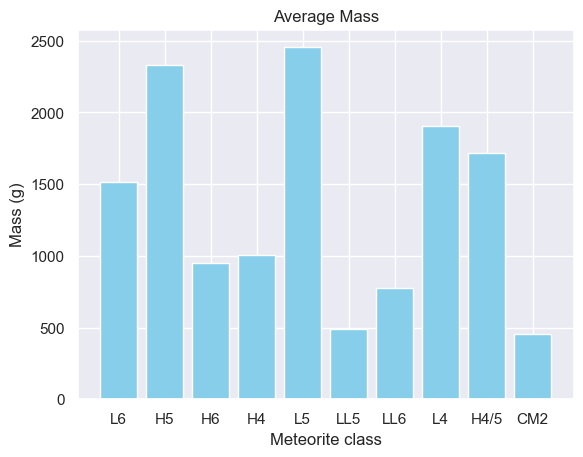

In [13]:
class_names = ["L6", "H5", "H6", "H4", "L5", "LL5", "LL6", "L4", "H4/5", "CM2"]
average_mass = [l6_class["Mass"].mean(), h5_class["Mass"].mean(), h6_class["Mass"].mean(), h4_class["Mass"].mean(),
              l5_class["Mass"].mean(), ll5_class["Mass"].mean(), ll6_class["Mass"].mean(), l4_class["Mass"].mean(),
              h45_class["Mass"].mean(),cm2_class["Mass"].mean()]

# plotting the average mass of each class

plt.bar(class_names, average_mass, color='skyblue')

plt.xlabel('Meteorite class')
plt.ylabel('Mass (g)')
plt.title('Average Mass')

plt.show()

This data was interesting as it visualized the average mass for each of the 10 main meteorite classes. I thought that the most interesting bar was L5 since it didn't have as many observations as some of the the other ones and still had the highest average mass. H4/5 and L4 were also interesting to me for similar reasons, not having as many observations yet still having a large average mass. 

Just like commmonality in meteorite class, average weight for these meteorites is also another topic of study that is important for research. The average mass can provide insights into many different areas like the formation of meteorite clusters, establishing mass distribution within these classes, planning trips to collect samples, and more. Overall this type of study helps us better understand our solar system.

### Average Mass per Year

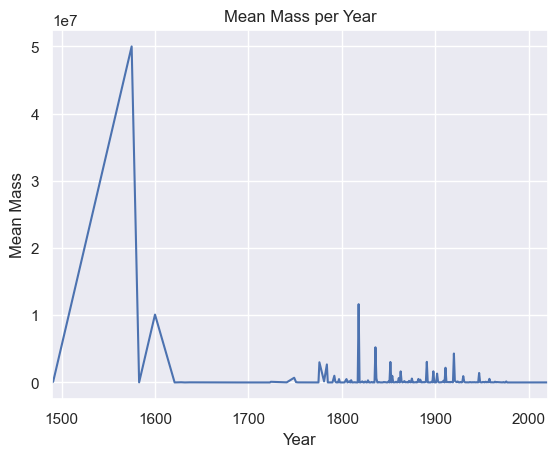

In [14]:
mean_mass_per_year = df.groupby('Year')['Mass'].mean()

#plotting the average mass per year

mean_mass_per_year.plot(kind='line', xlabel='Year', ylabel='Mean Mass', title='Mean Mass per Year')
plt.xlim(1490, 2021)
plt.show()



I first realized after initially creating this graph that there were some outliers that were heavily skewing the data, making it difficult to visualize. Using the IQR outlier rule below, I was able to rid the data of these outliers to better show the graph.

In [15]:
q1 = np.percentile(mean_mass_per_year, 25)
q3 = np.percentile(mean_mass_per_year, 75)

iqr = q3 - q1

upper_b = q3+(1.5 *iqr)

no_outliers = df[df['Mass'] < upper_b]

df = no_outliers

print("Upper Boundary Outlier Cutoff: ")
print(upper_b)


Upper Boundary Outlier Cutoff: 
164977.3076923077


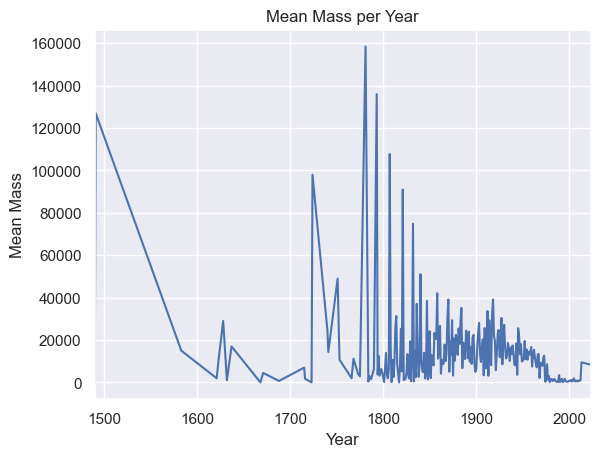

In [16]:
mean_mass_per_year = df.groupby('Year')['Mass'].mean()

mean_mass_per_year.plot(kind='line', xlabel='Year', ylabel='Mean Mass', title='Mean Mass per Year')
plt.xlim(1490, 2023)
plt.show()


There is no real pattern to this visual due to the amount of variability. Overall it appears that the mean mass of the meteorites have stayed relatively the same over long periods of time, and maybe even dipping towards the more recent dates. The largest spike is right before the 1800s. Furthermore, in the early 1800s there is a notable spike in mass along with two other spikes, another in the early 1800s and one in the early 1900s. However something worth mentioning is that since the vast majority of meteorites were discovered after they had landed and that these observatoins were recorded when they were found, this visual might be misleading since it doesn't accurately track the mass by year, rather only when the meteorite happened to be discovered that year. So if a meteorite had been found 100 years after it had landed, the mass would influence the average of the year it was found, not when it actually landed.

## Conclusion

While I am not experienced in the study of meteors, metoerites or space, if this data was shown to professionals in this field, it could actually be useful. As discussed earlier, studying meteorites is important for research in space and are the keys to the past of this universe. Studying meteorites, their composition, class, and mass could all be used for clues to the formation of this vast space around us. There are countless different topics that the study of these foreign rocks could help with and in the right hands, this data could help further the goal of knowledge in space and in our solar system.